# Grover Minimum: Algoritmo cuántico de búsqueda de mínimo de Dürr y Høyer implementado usando Qiskit
El presente código es un Jupyter Notebook que implementa el algoritmo de Grover para buscar un valor mínimo en un arreglo no ordenado de números basándose en el trabajo de Durr y Hoyer, usando el paquete Qiskit de IBM. Es una adaptación actualizada del código original de Gurleen Pannu.

1. La primera celda importa las librerías necesarias, incluyendo NumPy y Qiskit.
2. La segunda celda define dos funciones: `find_min` y `grover_search`. La función `find_min` utiliza la función `grover_search` para encontrar el valor mínimo en un arreglo no ordenado. La función `grover_search` implementa el algoritmo de Grover, que es un algoritmo cuántico para buscar en un arreglo no ordenado.
3. La tercera celda crea un arreglo no ordenado de 16 números y lo mezcla aleatoriamente. Luego llama a la función `find_min` con este arreglo y 64 iteraciones para encontrar el valor mínimo.

El algoritmo de Grover es un algoritmo cuántico que puede buscar en un arreglo no ordenado en tiempo O(sqrt(N)), donde N es el tamaño del arreglo. Esto es mucho más rápido que los algoritmos clásicos para buscar en un arreglo no ordenado, que tienen una complejidad temporal de O(N).

En este código, la función `grover_search` utiliza la implementación del algoritmo de Grover de Qiskit para encontrar el índice del valor mínimo en el arreglo. La función primero crea un circuito oráculo que marca los índices de los elementos en el arreglo que son menores o iguales a un umbral dado. Luego aplica el operador de Grover a este circuito oráculo, lo que amplifica la probabilidad de encontrar el valor mínimo. Finalmente, mide la salida del circuito cuántico y devuelve el índice del valor mínimo.

## Versiones usadas en este cuaderno
 - Python 3.12.1
 - qiskit 2.1.0
 - qiskit-aer 0.17.1
 
## Fuentes
https://github.com/Gurleenp/Quantum-Algorithms?utm_source=chatgpt.com

In [1]:
# Importamos las librerías necesarias
import numpy as np  # Para operaciones numéricas y manejo de arreglos
from qiskit import QuantumCircuit  # Para crear circuitos cuánticos
from qiskit_aer import AerSimulator  # Simulador cuántico de Qiskit Aer
from qiskit.circuit.library import grover_operator  # Operador de Grover (nota: debería ser GroverOperator en versiones recientes)
import random  # Para operaciones aleatorias
import matplotlib.pyplot as plt

In [2]:
# numbers = unsorted array of numbers
def find_min(numbers, iterations):
    n_items = len(numbers)  # Número de elementos en el arreglo
    threshold = numbers[random.randint(0, n_items-1)]  # Elegimos un valor umbral aleatorio del arreglo
    candidate_indices = [i for i in range(n_items) if numbers[i] <= threshold]  # Indices de elementos menores o iguales al umbral
    for _ in range(iterations):  # Iteramos la cantidad de veces indicada
        new_threshold = numbers[grover_search(candidate_indices, n_items)]  # Buscamos un nuevo valor menor usando Grover
        if new_threshold < threshold:  # Si encontramos un valor menor, actualizamos el umbral
            threshold = new_threshold
            candidate_indices = [idx for idx in candidate_indices if numbers[idx] <= threshold]  # Actualizamos los candidatos
    return threshold  # Retornamos el valor mínimo encontrado

def grover_search(candidate_indices, n_items):
    n_qubits = int(np.ceil(np.log2(n_items)))  # Calculamos el número de qubits necesarios
    oracle = np.identity(2**n_qubits)  # Creamos una matriz identidad para el oráculo
    for idx in candidate_indices:
        oracle[idx, idx] = -1  # Marcamos los índices candidatos con -1 (fase)
    oracle_circuit = QuantumCircuit(n_qubits)  # Creamos el circuito oráculo
    oracle_circuit.unitary(oracle, range(n_qubits))  # Insertamos la matriz oráculo como una compuerta unitaria
    grover_op = grover_operator(oracle_circuit, insert_barriers=True)  # Creamos el operador de Grover
    grover_circuit = QuantumCircuit(n_qubits, n_qubits)  # Creamos el circuito de Grover
    grover_circuit.h(range(n_qubits))  # Inicializamos en superposición
    n_grover_iterations = int(np.sqrt(n_items))  # Número de iteraciones de Grover
    for _ in range(n_grover_iterations):
        grover_circuit = grover_circuit.compose(grover_op)  # Aplicamos el operador de Grover
    grover_circuit.measure(range(n_qubits), range(n_qubits))  # Medimos los qubits
    simulator = AerSimulator()  # Instanciamos el simulador cuántico
    job = simulator.run(grover_circuit)  # Ejecutamos el circuito en el simulador
    result = job.result()  # Obtenemos los resultados
    counts = result.get_counts()  # Obtenemos los conteos de medición
    measured = max(counts, key=counts.get)  # Seleccionamos el resultado más frecuente
    return int(measured, 2)  # Convertimos el resultado binario a entero

In [3]:
# Creamos un arreglo de números del 0 al 15
desordenados = list(range(16))
desordenados.reverse()  # Invertimos el arreglo
# Eliminamos el cero para evitar el caso trivial
desordenados.remove(0)
# Agregamos el número 19 para asegurar que el arreglo no esté vacío
desordenados.append(19)
# Mezclamos aleatoriamente el arreglo
random.shuffle(desordenados)
print(desordenados)  # Mostramos el arreglo desordenado
# Buscamos el valor mínimo usando el algoritmo de Grover
find_min(desordenados, 64)

[7, 10, 12, 9, 15, 8, 13, 14, 19, 5, 6, 1, 3, 4, 11, 2]


11

## Resumen adicional

Este cuaderno implementa el algoritmo de Grover para encontrar el valor mínimo en un arreglo no ordenado. El proceso consiste en:

- Inicializar un umbral aleatorio y seleccionar los candidatos menores o iguales a ese umbral.
- Usar el algoritmo de Grover para buscar un índice de un valor menor dentro de los candidatos.
- Si se encuentra un valor menor, se actualiza el umbral y se repite el proceso.
- Finalmente, se retorna el valor mínimo encontrado tras varias iteraciones.

El uso de Grover permite reducir el número de búsquedas necesarias respecto a un algoritmo clásico, aprovechando la computación cuántica para acelerar la búsqueda en arreglos no ordenados.

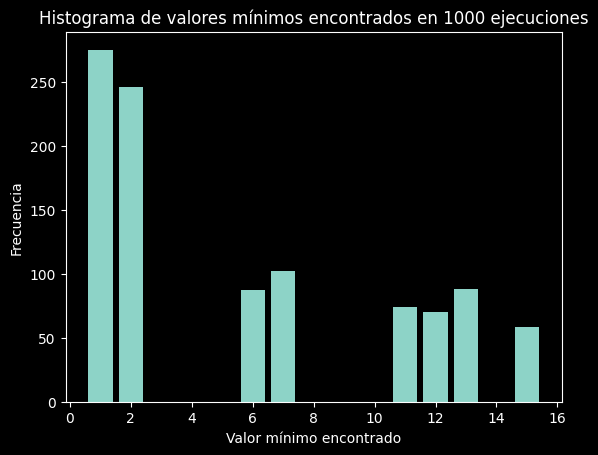

In [5]:
# Ejecutar el método 100 veces y recolectar los mínimos encontrados
def repeated_min_search(runs=100):
    min_values = []
    for _ in range(runs):
        arr = desordenados.copy()
        random.shuffle(arr)
        min_values.append(find_min(arr, 64))
    return min_values

min_results = repeated_min_search(1000)
plt.hist(min_results, bins=range(min(min_results), max(min_results)+2), align='left', rwidth=0.8)
plt.xlabel('Valor mínimo encontrado')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores mínimos encontrados en 1000 ejecuciones')
plt.show()